## ULISES CABRERA GONZÁLEZ

# Instacart Market Basket

## Descripción de archivos

The dataset for this competition is a relational set of files describing customers' orders over time. The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users. For each user, we provide between 4 and 100 of their orders, with the sequence of products purchased in each order. We also provide the week and hour of day the order was placed, and a relative measure of time between orders. For more information, see the blog post accompanying its public release.

Each entity (customer, product, order, aisle, etc.) has an associated unique id. Most of the files and variable names should be self-explanatory.
aisles.csv

 aisle_id,aisle  
 1,prepared soups salads  
 2,specialty cheeses  
 3,energy granola bars  
 ...

departments.csv

 department_id,department  
 1,frozen  
 2,other  
 3,bakery  
 ...

order_products__train.csv

These files specify which products were purchased in each order. 'reordered' indicates that the customer has a previous order that contains the product. Note that some orders will have no reordered items.

 order_id,product_id,add_to_cart_order,reordered  
 1,49302,1,1  
 1,11109,2,1  
 1,10246,3,0  
 ... 

orders.csv

'order_dow' is the day of week.

 order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order  
 2539329,1,prior,1,2,08,  
 2398795,1,prior,2,3,07,15.0  
 473747,1,prior,3,3,12,21.0  
 ...

products.csv

 product_id,product_name,aisle_id,department_id
 
 1,Chocolate Sandwich Cookies,61,19  
 2,All-Seasons Salt,104,13  
 3,Robust Golden Unsweetened Oolong Tea,94,7  
 ...


In [2]:
#### Cargar librerías a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
#### Carga de datos
dfOrderTrain = pd.read_csv('order_products__train.csv')
dfOrder = pd.read_csv('orders.csv')
dfDepartments = pd.read_csv('departments.csv')
dfProducts = pd.read_csv('products.csv')
dfAisles = pd.read_csv('aisles.csv')

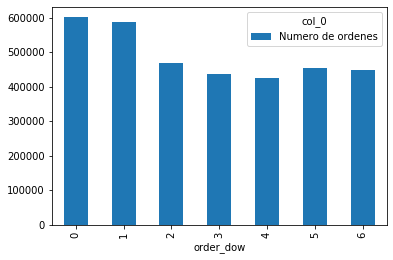

In [4]:
####CANTIDAD DE ÓRDENES REALIZADAS POR DÍA DE SEMANA (order_dow) 

pd.crosstab(dfOrder["order_dow"], "Numero de ordenes").plot(kind="bar")

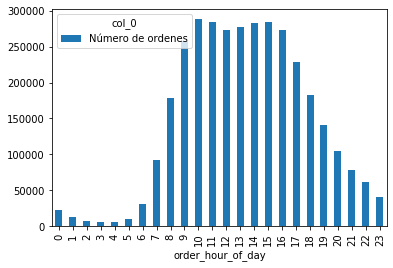

In [5]:
#### CANTIDAD DE ÓRDENES REALIZADAS POR HORA DEL DÍA

pd.crosstab(dfOrder["order_hour_of_day"], "Número de ordenes").plot(kind="bar")

In [6]:
dfOrderTrain.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [7]:
#### ¿CUÁNTOS PRODUCTOS COMPRA EN PROMEDIO UN USUARIO EN UNA ORDEN?

pd.crosstab(dfOrderTrain["order_id"], "Productos por orden", values=dfOrderTrain["product_id"], aggfunc="count").mean()

col_0
Productos por orden    10.552759
dtype: float64

In [8]:
#### DEPARTAMENTO QUE MÁS ESTÁ PRESENTE EN LAS ÓRDENES

merged_inner1 = pd.merge(left = dfOrderTrain, right = dfProducts,
                       how = "inner", left_on = "product_id", right_on = "product_id")
merged_inner2= pd.merge(left=merged_inner1, right=dfDepartments,
                       how="inner", left_on= "department_id", right_on="department_id")
merged_inner2.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,dairy eggs
1,816049,49302,7,1,Bulgarian Yogurt,120,16,dairy eggs
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,dairy eggs
3,1383349,49302,11,1,Bulgarian Yogurt,120,16,dairy eggs
4,1787378,49302,8,0,Bulgarian Yogurt,120,16,dairy eggs


In [9]:
merged_inner2.pivot_table("order_id", "department", aggfunc="count").sort_values("order_id", ascending=False).iloc[:1]

,order_id
department,
produce,409087


In [9]:
### ¿CUÁLES SON LOS MEJORES PRODUCTOS EN VENTA?

pd.crosstab(merged_inner2["product_name"], 
            "Numero de veces vendido").sort_values(by="Numero de veces vendido",ascending=False).iloc[:10]

col_0,Numero de veces vendido
product_name,
Banana,18726
Bag of Organic Bananas,15480
Organic Strawberries,10894
Organic Baby Spinach,9784
Large Lemon,8135
Organic Avocado,7409
Organic Hass Avocado,7293
Strawberries,6494
Limes,6033


In [10]:
#### ¿CUÁLES SON LOS PRODUCTOS MÁS FRECUENTES REORDENADOS?

pd.crosstab(merged_inner2["product_name"], "Frecuencia", 
            values=merged_inner2["reordered"], 
            aggfunc="sum").sort_values("Frecuencia",ascending=False).iloc[:10]


col_0,Frecuencia
product_name,
Banana,16557
Bag of Organic Bananas,13362
Organic Strawberries,8603
Organic Baby Spinach,8055
Organic Avocado,6226
Organic Hass Avocado,6042
Large Lemon,5923
Strawberries,4786
Organic Raspberries,4279
